#### 3. Can you use [Planck's Law](https://en.wikipedia.org/wiki/Planck%27s_law) to determine the temperature of an object using spectral energy density? For reference, the spectral density $B$ of radiation emanating from a black body is $B(\lambda, T) = \frac{2 hc^2}{\lambda^5} \cdot \left(\exp \frac{h c}{\lambda k T} - 1\right)^{-1}$. Here $\lambda$ is the wavelength, $T$ is the temperature, $c$ is the speed of light, $h$ is Planck's constant, and $k$ is the Boltzmann constant. You measure the energy for different wavelengths $\lambda$ and you now need to fit the spectral density curve to Planck's law.

Choose units such that $\frac{hc}{k} = 1$ and note that $2hc^2$ is just some constant, so irrelevant for our optimization procedure.

Roughly speaking we want to solve $B(\lambda, T) = B_0$ for $T$, i.e. define a mapping $T(\lambda, B_0)$ such that $B(\lambda, T(\lambda, B_0)) = B_0$ holds for all $\lambda$ and $B_0$.

With this simplification we get a reduced spectral density function:

In [1]:
import torch
from torch import Tensor
import matplotlib.pyplot as plt

In [25]:
def spectral_density_reduced(lambda_: Tensor, T_: Tensor) -> Tensor:
    """Assuming T to be constant and units chosen properly. Ignoring leading constants as well."""
    x1 = torch.float_power(lambda_, 5)
    x2 = torch.exp(1 / (lambda_ * T_)) - 1
    x3 = x1 * x2
    return 1 / x3

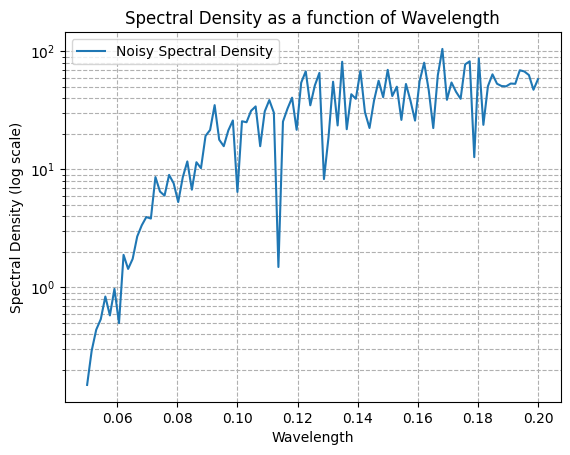

In [72]:
x = torch.linspace(0.05, 0.2, 100)
for T_ in [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 2.0][::-1]:
    y = spectral_density_reduced(x, T_)
    # plt.semilogy(x, y, label = f"T = {T_}")

spec_dens = spectral_density_reduced(x, 1.2)
noise = torch.randn_like(spec_dens) * torch.square(torch.tensor([0.6]))
noisy_spec_dens = spec_dens * (1 + noise)
plt.semilogy(x, noisy_spec_dens, label = "Noisy Spectral Density")

plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Spectral Density (log scale)")
plt.title("Spectral Density as a function of Wavelength")
plt.grid(True, which="both", linestyle="--")

In [74]:
B = noisy_spec_dens
x = torch.linspace(0.05, 0.2, 100)

def func(T_: Tensor) -> Tensor:
    return spectral_density_reduced(x, T_)

def func_loss(T_: Tensor) -> Tensor:
    return torch.sum(torch.square(func(T_) - B))

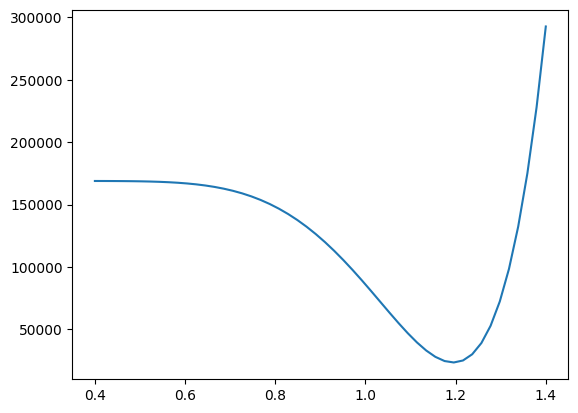

In [85]:
T_LIST = torch.linspace(0.4, 1.4, 50)
ys = [func_loss(T_) for T_ in T_LIST] 
plt.plot(T_LIST, ys, label = "Loss")